In [1]:
from pandas import DataFrame, Grouper
import pandas as pd
import numpy as np
from datetime import datetime
import sys

In [2]:
# import our own stuff
sys.path.append("../python/src")

from tools import read_water_data, extract_features, merge_wbseries_with_oecd_data
from tools import get_oecd_iso3_code_mapping, crs_to_worldbank_countrynames
from worldbankApi import get_regionnames, fetch_series, default_series
from waterData import default_features

In [3]:
# set some options
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 600)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

datadir = "../data/"
cachedir = "../data/cache" 

In [4]:
# read some data and get some mapping that may needs calculations
codemapping = get_oecd_iso3_code_mapping(cachedir=cachedir,datadir=datadir)

# the AG.SRF.TOTL.K2 data is the surface of countries in sq. km
# without the series-parameter population, surface and median/mean-income is fetched. 
# needes `pip install world_bank_data`
wbdf = fetch_series(cachedir=cachedir,series=['AG.SRF.TOTL.K2'])

# the data from oecd must be downloaded and saved as zips in the data-dir, check readme for links
oecddf = read_water_data(setname="fullset",datadir=datadir,cachedir=cachedir)



Reading countrycode-mapping cached file: ../data/cache/oecdiso3.p
Reading Data from cached file: ../data/cache/AG.SRF.TOTL.K2.p
Reading Datafrom cached file: ../data/cache/fullset.p


In [5]:
# filter out useless / unrelevant data
oecddf = oecddf[oecddf['USD_Commitment'] != 0.0]
oecddf = oecddf[oecddf['USD_Commitment'].notnull()]
oecddf = oecddf[oecddf['FlowCode'].isin(['13','11'])]

In [6]:
#oecddf = oecddf[oecddf['DonorCode'].isin(codemapping)]
#display(oecddf.describe())
# show me what we loos if we filter only for known codemapping for recipients
tmp = oecddf[~oecddf.RecipientCode.isin(list(codemapping))]
display(tmp.sample())
display(tmp.describe())
# and the same for DonorCodes
#tmp = oecddf[~oecddf.DonorCode.isin(list(codemapping))]
#display(tmp.sample())
#display(tmp.describe())

# only filter for known recipients - e.g. no bilateral or wider regions (like continents) projects will be analysed
oecddf = oecddf[oecddf['RecipientCode'].isin(codemapping)]


,Year,DonorCode,DonorName,AgencyCode,AgencyName,CrsID,ProjectNumber,InitialReport,RecipientCode,RecipientName,RegionCode,RegionName,IncomegroupCode,IncomegroupName,FlowCode,FlowName,Bi_Multi,Category,Finance_t,Aid_t,USD_Commitment,USD_Disbursement,USD_Received,USD_Commitment_Defl,USD_Disbursement_Defl,USD_Received_Defl,USD_Adjustment,USD_Adjustment_Defl,USD_AmountUntied,USD_AmountPartialTied,USD_AmountTied,USD_AmountUntied_Defl,USD_AmountPartialTied_Defl,USD_Amounttied_Defl,USD_IRTC,USD_Expert_Commitment,USD_Expert_Extended,USD_Export_Credit,CurrencyCode,Commitment_National,Disbursement_National,GrantEquiv,USD_GrantEquiv,ShortDescription,ProjectTitle,PurposeCode,PurposeName,SectorCode,SectorName,ChannelCode,ChannelName,ChannelReportedName,ParentChannelCode,Geography,ExpectedStartDate,CompletionDate,LongDescription,SDGfocus,Gender,Environment,PDGG,Trade,RMNCH,DRR,Nutrition,Disability,FTC,PBA,InvestmentProject,AssocFinance,Biodiversity,ClimateMitigation,ClimateAdaptation,Desertification,CommitmentDate,TypeRepayment,NumberRepayment,Interest1,Interest2,Repaydate1,Repaydate2,USD_Interest,USD_Outstanding,USD_Arrears_Principal,USD_Arrears_Interest,BudgetIdent,CapitalExpend,PSIflag,PSIAddType,PSIAddAssess,PSIAddDevObj
251295,2018,10,Sweden,6,Swedish International Development Authority,2018066715A,SE-0-SE-6-12205A0101-GGG-15142,1.0,9998,"Bilateral, unspecified",15006,Regional and Unspecified,10024,Part I unallocated by income,11,ODA Grants,1,10,110,D02,0.001833,0.001833,NaN,0.001833,0.001833,NaN,NaN,NaN,0.0,0.0,0.001833,0.0,0.0,0.001833,NaN,NaN,NaN,NaN,10,0.015931,0.015931,0.015931,0.001833,CLUSTERCONTRIBUTION FOR DEVELOPMENT- AND POVERTY ANALYSIS - CLUSTER CONTRIBUTION FOR DEVELOPMENT- AND POVERTY ANALYSIS,Clustercontribution for development- and poverty analysis - Cluster contribution for development- and poverty analysis,15142,Macroeconomic policy,151,I.5.a. Government & Civil Society-general,11000,Donor Government,Sida,11000,NaN,2018-01-01,2018-12-31,"Cluster contribution for development- and poverty analysis (studies, publications etc.)",NaN,0,0,0,0,0,0.0,NaN,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2018-01-01,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,15142,NaN,NaN,NaN,NaN,NaN


,InitialReport,USD_Commitment,USD_Disbursement,USD_Received,USD_Commitment_Defl,USD_Disbursement_Defl,USD_Received_Defl,USD_Adjustment,USD_Adjustment_Defl,USD_AmountUntied,USD_AmountPartialTied,USD_AmountTied,USD_AmountUntied_Defl,USD_AmountPartialTied_Defl,USD_Amounttied_Defl,USD_IRTC,USD_Expert_Commitment,USD_Expert_Extended,USD_Export_Credit,Commitment_National,Disbursement_National,GrantEquiv,USD_GrantEquiv,DRR,Nutrition,Disability,FTC,PBA,InvestmentProject,AssocFinance,Biodiversity,ClimateMitigation,ClimateAdaptation,Desertification,TypeRepayment,NumberRepayment,Interest2,USD_Interest,USD_Outstanding,USD_Arrears_Principal,USD_Arrears_Interest,CapitalExpend,PSIflag,PSIAddType
count,375149.000000,375149.000000,294659.000000,141828.000000,375149.000000,294659.000000,141828.000000,21.000000,21.000000,260533.000000,114438.000000,178946.000000,260533.000000,114438.000000,178946.000000,36811.000000,1532.000000,1337.000000,1288.000000,375149.000000,294659.000000,76293.000000,76293.000000,10387.000000,12082.000000,12514.000000,130980.0,8430.000000,16057.0,1204.000000,200446.000000,200559.000000,143535.000000,169200.000000,2528.000000,1946.000000,17091.000000,60129.000000,60598.000000,47959.000000,48769.000000,3470.000000,135.000000,19.000000
mean,2.400843,1.878038,1.398138,0.004153,2.067479,1.433350,0.004162,-4.768981,-4.733795,1.222857,0.435084,0.439653,1.297458,0.534125,0.522954,0.034019,0.000904,0.001257,0.013655,3.525317,2.583973,3.706078,2.026742,0.116684,0.132925,0.055618,1.0,0.931435,1.0,0.529900,0.124777,0.113732,0.121970,0.041909,3.433149,0.533916,5.125271,0.000719,0.090859,0.005119,0.233783,0.000004,1.925926,2.052632
std,2.582650,25.440000,26.350428,0.374698,27.124960,27.773577,0.371871,16.510673,16.100511,11.171867,5.700030,6.396464,11.865575,6.803723,7.279945,0.749094,0.008672,0.010595,0.339976,61.012163,60.730802,99.300667,44.847834,0.407490,0.405300,0.265687,0.0,0.252727,0.0,0.499313,0.436940,0.413933,0.412234,0.231782,2.077896,0.874742,107.588684,0.031371,4.432897,0.243669,2.177488,0.000076,0.262867,0.970320
min,1.000000,-1421.530000,-28.630100,-0.110413,-1300.270000,-28.750300,-0.097833,-71.461000,-68.598900,-1421.530000,0.000000,-581.209000,-1300.270000,0.000000,-630.701000,-0.380509,0.000000,0.000000,0.000000,-1890.710000,-28.630100,-301.346000,-44.771200,0.000000,0.000000,0.000000,1.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,0.021128,0.009707,0.000000,0.023033,0.009987,0.000000,0.000000,0.000000,0.005562,0.000000,0.000000,0.006013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022500,0.009323,0.013333,0.015027,0.000000,0.000000,0.000000,1.0,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,1.000000,0.104347,0.056680,0.000000,0.117068,0.059122,0.000000,0.000000,0.000000,0.063625,0.000000,0.000000,0.068172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.131000,0.060691,0.078909,0.078909,0.000000,0.000000,0.000000,1.0,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,3.000000,0.513626,0.279110,-0.000000,0.582532,0.289702,-0.000000,0.000000,0.000000,0.375707,0.000000,0.027379,0.408631,0.000000,0.029805,0.000000,0.000000,0.000000,0.000000,0.805000,0.399590,0.500000,0.392700,0.000000,0.000000,0.000000,1.0,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
max,8.000000,6585.080000,6585.080000,68.883800,7209.450000,7209.450000,72.635200,0.000000,0.000000,1331.110000,552.914000,692.459000,1460.750000,603.487000,848.943000,76.249100,0.225454,0.243653,9.672680,20201.500000,20201.500000,20201.500000,6585.080000,2.000000,2.000000,2.000000,1.0,1.000000,1.0,1.000000,2.000000,2.000000,2.000000,3.00

In [7]:
# only relevant features
idf = extract_features(oecddf,features=default_features)
display(idf.sample())
display(idf.describe())

,DonorName,RecipientName,DonorCode,RecipientCode,IncomegroupName,USD_Commitment_Defl,USD_Received_Defl,ShortDescription,AgencyName,FlowCode,SectorCode,ProjectTitle,PurposeName,SectorName,ChannelName,ChannelReportedName,ExpectedStartDate,CompletionDate,LongDescription,CommitmentDate,USD_GrantEquiv
59961,Belgium,Algeria,2,130,UMICs,0.496836,NaN,APPUI INSTITUTIONNEL CONDITION FÉMININE,Directorate General for Co-operation and Development,11,151,Appui institutionnel Condition féminine,"Women's rights organisations and movements, and government institutions",I.5.a. Government & Civil Society-general,Public Sector Institutions,BTC - Belgian Technical Cooperation - BTC,NaT,2010-11-21,NaN,NaT,NaN


,USD_Commitment_Defl,USD_Received_Defl,USD_GrantEquiv
count,1.732484e+06,594498.000000,306737.000000
mean,2.042915e+00,0.015937,0.553247
std,1.925197e+01,0.964376,9.538740
min,-2.180880e+01,0.000000,-7.321260
25%,1.511315e-02,0.000000,0.008998
50%,7.511220e-02,0.000000,0.039810
75%,4.055060e-01,-0.000000,0.176263
max,4.704100e+03,288.942000,4087.440000


In [8]:
# merge the data from the worldbank with the the microdata of the oecd grouped by year 
df = merge_wbseries_with_oecd_data(idf,wbdf,codemapping=codemapping,cachedir=cachedir)
display(df.sample(5).T)
display(df.describe())
#print(get_oecd_iso3_code_mapping())

Reading Data from cached file: ../data/cache/countrycodes.p


,990031,603997,586391,991171,332685
DonorName,Italy,Germany,United States,France,United States
RecipientName,Tanzania,Sri Lanka,Rwanda,Togo,Rwanda
DonorCode,6,5,302,4,302
RecipientCode,282,640,266,283,266
IncomegroupName,LDCs,LMICs,LDCs,LDCs,LDCs
USD_Commitment_Defl,0.0236044,0.0325248,0.0218631,0.000354066,0.0277878
USD_Received_Defl,NaN,-0,NaN,NaN,NaN
ShortDescription,"AFYA KWA WOTE, HEALTH FOR EVERYBODY IN YOVI VALLEY OF TANZANIA - 2ND YEAR",CONFLICT MANAGEMENT,INLAND FREIGHT COST OF USAID TITLE II FOOD AID FOR DURBAN PREPOSITIONING OF FOOD AID,SANTÉ DE BASE-ÉDUCATION SANITAIRE,"COMMODITY VALUE FOR VEGETABLE OIL, 4LITER / METRIC TONS: 25."
AgencyName,Local administration,Foreign Office,Agency for International Development,COOP DECENTRAL/MAE,Agency for International Development
FlowCode,11,11,11,11,11


,USD_Commitment_Defl,USD_Received_Defl,USD_GrantEquiv,Donorstat AG.SRF.TOTL.K2,Donorstat longitude,Donorstat latitude,Recipientstat AG.SRF.TOTL.K2,Recipientstat longitude,Recipientstat latitude
count,1.076184e+06,364730.000000,287126.000000,1.076184e+06,1.076184e+06,1.076184e+06,1.076184e+06,1.060869e+06,1.060869e+06
mean,1.795956e+00,0.002864,0.517232,2.653377e+06,1.685949e+01,4.171342e+01,8.938802e+05,2.314332e+01,1.128514e+01
std,2.088455e+01,0.195005,9.714755,4.023211e+06,7.234763e+01,1.804391e+01,1.654586e+06,6.429758e+01,2.062472e+01
min,-2.180880e+01,0.000000,-7.321260,2.590000e+03,-7.703200e+01,-4.128650e+01,1.000000e+01,-1.752160e+02,-3.489410e+01
25%,1.630330e-02,0.000000,0.008874,3.013400e+05,-3.703270e+00,3.888950e+01,1.113700e+05,-7.500340e+00,-4.325000e+00
50%,8.136960e-02,0.000000,0.038704,3.779710e+05,4.890950e+00,4.189550e+01,3.420000e+05,3.050380e+01,1.214750e+01
75%,4.343953e-01,-0.000000,0.168792,7.741220e+06,1.806450e+01,5.150020e+01,1.001450e+06,7.143820e+01,2.863530e+01
max,4.704100e+03,43.047700,4087.440000,9.984670e+06,1.747760e+02,6.413530e+01,9.562950e+06,1.790896e+02,5.396780e+01


In [9]:
# read the historical classification in Incomegroups from the worldbank
icgroup_df = pd.read_csv(datadir+"/OGHIST.csv",header=0,quotechar='"',low_memory=False,sep=";",na_values=['..'])

# the historical data some datapoints
# fill missing values with the value from the next valid year 
# this is a little dirty in code
T = icgroup_df.T
#display(T)
#display(T.describe())
T = T.fillna(method ='backfill') 
#display(T)
#display(T.describe())
icgroup_df = T.T
icgroup_df = icgroup_df.melt(id_vars=('id','Country'),var_name="Year")
display(icgroup_df.sample())
# replace the values used for classification with the values used by oecd
icgroup_df = icgroup_df.replace({'value': {'L': 'LDCs','LM': 'LMICs', 'UM':'UMICs','H': 'HICs', 'LM*':'LMICs'}})
# give it a nice name
icgroup_df = icgroup_df.rename(columns={'value': 'IncomeGroup'})
# create a mergeable unique feature
icgroup_df['mergefield'] = icgroup_df['Year'].apply(lambda x: str(x))
icgroup_df['mergefield'] = icgroup_df['mergefield'] + icgroup_df['id']
display(icgroup_df.sample(10))


,id,Country,Year,value
7287,MWI,Malawi,2019,L


,id,Country,Year,IncomeGroup,mergefield
1051,PHL,Philippines,1991,LMICs,1991PHL
5188,CYM,Cayman Islands,2010,HICs,2010CYM
2053,CAF,Central African Republic,1996,LDCs,1996CAF
1399,DMA,Dominica,1993,LMICs,1993DMA
2763,GIB,Gibraltar,1999,HICs,1999GIB
3297,RUS,Russian Federation,2001,LMICs,2001RUS
6554,EGY,"Egypt, Arab Rep.",2016,LMICs,2016EGY
5869,COG,"Congo, Rep.",2013,LMICs,2013COG
4648,SRB,Serbia,2007,UMICs,2007SRB
6737,BLR,Belarus,2017,UMICs,2017BLR


In [10]:
df.sample()

,DonorName,RecipientName,DonorCode,RecipientCode,IncomegroupName,USD_Commitment_Defl,USD_Received_Defl,ShortDescription,AgencyName,FlowCode,SectorCode,ProjectTitle,PurposeName,SectorName,ChannelName,ChannelReportedName,ExpectedStartDate,CompletionDate,LongDescription,CommitmentDate,USD_GrantEquiv,Donorstat AG.SRF.TOTL.K2,Donorstat iso3Code,Donorstat iso2Code,Donorstat region,Donorstat adminregion,Donorstat incomeLevel,Donorstat lendingType,Donorstat capitalCity,Donorstat longitude,Donorstat latitude,Recipientstat AG.SRF.TOTL.K2,Recipientstat iso3Code,Recipientstat iso2Code,Recipientstat region,Recipientstat adminregion,Recipientstat incomeLevel,Recipientstat lendingType,Recipientstat capitalCity,Recipientstat longitude,Recipientstat latitude
877358,Italy,Kenya,6,248,LMICs,0.002398,NaN,IMPROVING MOBILITY 'OF DISABLED IN KENYA,Local administration,11,121,Improving mobility 'of disabled in Kenya,Medical services,"I.2.a. Health, General",Donor country-based NGO,Fondazione Fontana onlus,2016-12-06,2016-12-31,Project: Improving mobility 'of disabled people in Kenya through the purchase of a pick up van use,2016-12-06,0.001548,301340.0,ITA,IT,Europe & Central Asia,,High income,Not classified,Rome,12.4823,41.8955,580370.0,KEN,KE,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,Blend,Nairobi,36.8126,-1.27975


In [11]:
# create a mergefield within the dataframe 
df['mergefield'] = df['CommitmentDate'].apply(lambda x: str(x.year))
df['mergefield'] = df['mergefield'] + df['Recipientstat iso3Code']

df_merged = df.merge(icgroup_df.add_prefix("worldbank "),
                       right_on='worldbank mergefield',
                       how="left",left_on='mergefield',indicator=True)
df_merged.drop(columns=['mergefield','worldbank id','worldbank Country',
                'worldbank Year','worldbank mergefield','_merge'],inplace=True)

In [12]:
display(df_merged.sample())
display(df_merged.describe())
# show the difference
display(df_merged[['IncomegroupName','USD_Commitment_Defl']].groupby(['IncomegroupName']).count())
display(df_merged[['worldbank IncomeGroup','USD_Commitment_Defl']].groupby(['worldbank IncomeGroup']).count())

,DonorName,RecipientName,DonorCode,RecipientCode,IncomegroupName,USD_Commitment_Defl,USD_Received_Defl,ShortDescription,AgencyName,FlowCode,SectorCode,ProjectTitle,PurposeName,SectorName,ChannelName,ChannelReportedName,ExpectedStartDate,CompletionDate,LongDescription,CommitmentDate,USD_GrantEquiv,Donorstat AG.SRF.TOTL.K2,Donorstat iso3Code,Donorstat iso2Code,Donorstat region,Donorstat adminregion,Donorstat incomeLevel,Donorstat lendingType,Donorstat capitalCity,Donorstat longitude,Donorstat latitude,Recipientstat AG.SRF.TOTL.K2,Recipientstat iso3Code,Recipientstat iso2Code,Recipientstat region,Recipientstat adminregion,Recipientstat incomeLevel,Recipientstat lendingType,Recipientstat capitalCity,Recipientstat longitude,Recipientstat latitude,worldbank IncomeGroup
470345,United States,Serbia,302,63,UMICs,0.045955,NaN,NATIONAL ENDOWMENT FOR DEMOCRACY GRANT TO ASSOCIATION OF LOCAL INDEPENDENT MEDIA (SERBIA),State Department,11,151,National Endowment for Democracy Grant to Association of Local Independent Media (Serbia),Decentralisation and support to subnational government,I.5.a. Government & Civil Society-general,Donor country-based NGO,Association of Local Independent Media (Serbia),2010-01-01,2010-12-31,"To open a debate on challenges facing Serbia s democratic transition at the local level. On the 10th anniversary of the breakthrough events of 2000, members of Local Press will produce, exchange, and publish 17 articles, organize a public roundtable, and produce a television program to help to fill a void in information regarding the economic, social, and political changes occurring in post-Milosevic Serbia.",2010-12-31,NaN,9831510.0,USA,US,North America,,High income,Not classified,Washington D.C.,-77.032,38.8895,88360.0,SRB,RS,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IBRD,Belgrade,20.4656,44.8024,UMICs


,USD_Commitment_Defl,USD_Received_Defl,USD_GrantEquiv,Donorstat AG.SRF.TOTL.K2,Donorstat longitude,Donorstat latitude,Recipientstat AG.SRF.TOTL.K2,Recipientstat longitude,Recipientstat latitude
count,1.076184e+06,364730.000000,287126.000000,1.076184e+06,1.076184e+06,1.076184e+06,1.076184e+06,1.060869e+06,1.060869e+06
mean,1.795956e+00,0.002864,0.517232,2.653377e+06,1.685949e+01,4.171342e+01,8.938802e+05,2.314332e+01,1.128514e+01
std,2.088455e+01,0.195005,9.714755,4.023211e+06,7.234763e+01,1.804391e+01,1.654586e+06,6.429758e+01,2.062472e+01
min,-2.180880e+01,0.000000,-7.321260,2.590000e+03,-7.703200e+01,-4.128650e+01,1.000000e+01,-1.752160e+02,-3.489410e+01
25%,1.630330e-02,0.000000,0.008874,3.013400e+05,-3.703270e+00,3.888950e+01,1.113700e+05,-7.500340e+00,-4.325000e+00
50%,8.136960e-02,0.000000,0.038704,3.779710e+05,4.890950e+00,4.189550e+01,3.420000e+05,3.050380e+01,1.214750e+01
75%,4.343953e-01,-0.000000,0.168792,7.741220e+06,1.806450e+01,5.150020e+01,1.001450e+06,7.143820e+01,2.863530e+01
max,4.704100e+03,43.047700,4087.440000,9.984670e+06,1.747760e+02,6.413530e+01,9.562950e+06,1.790896e+02,5.396780e+01


,USD_Commitment_Defl
IncomegroupName,
LDCs,390103
LMICs,374656
MADCTs,16137
Other LICs,12587
UMICs,282701


,USD_Commitment_Defl
worldbank IncomeGroup,
HICs,8980
LDCs,402254
LMICs,428439
UMICs,210241


In [13]:
df_merged[['RecipientName','worldbank IncomeGroup','USD_Commitment_Defl']].groupby(['RecipientName','worldbank IncomeGroup']).count()

USD_Commitment_Defl
RecipientName                         worldbank IncomeGroup                     
Afghanistan                           LDCs                                 16210
Albania                               LDCs                                   236
                                      LMICs                                 4027
                                      UMICs                                 3264
Algeria                               LMICs                                 2045
                                      UMICs                                 2760
Angola                                LDCs                                  2784
                                      LMICs                                 3609
                                      UMICs                                 1450
Antigua and Barbuda                   HICs                                   304
                                      UMICs                                   99
Argentina                             HICs                                   902
                                      LMICs                                   72
                                      UMICs                                 5950
Armenia                               LDCs                                   715
                                      LMICs                                 3323
                                      UMICs                                  958
Aruba                                 HICs                                    73
Azerbaijan                            LDCs                                   691
                                      LMICs                                  896
                                      UMICs                                 2324
Bahamas                               HICs                                     8
Bahrain                               HICs                                    68
                                      UMICs                                   76
Bangladesh                            LDCs                                  9413
                                      LMICs                                 6067
Barbados                              HICs                                    64
                                      UMICs                                  126
Belarus                               LMICs                                  267
                                      UMICs                                 2698
Belize                                LMICs                                  379
                                      UMICs                                  837
Benin                                 LDCs                                  7782
Bermuda                               HICs                                     5
Bhutan                                LDCs                                   828
                                      LMICs                                 1807
Bolivia                               LMICs                                15976
Bosnia and Herzegovina                LDCs                                   733
                                      LMICs                                 4827
                                      UMICs                                 5647
Botswana                              LMICs                                  447
                                      UMICs                                 2637
Brazil                                LMICs                                 2900
                                      UMICs                                12119
British Virgin Islands                HICs                                    36
Brunei Darussalam                     HICs                                    14
Burkina Faso                          LDCs                                 12161
Burundi                               LDCs                                  6123
Cabo Verde 

,USD_Commitment_Defl,USD_Received_Defl,USD_GrantEquiv,Donorstat AG.SRF.TOTL.K2,Donorstat longitude,Donorstat latitude,Recipientstat AG.SRF.TOTL.K2,Recipientstat longitude,Recipientstat latitude
count,1.049914e+06,364045.000000,287126.000000,1.049914e+06,1.049914e+06,1.049914e+06,1.049914e+06,1.034605e+06,1.034605e+06
mean,1.610866e+00,0.002750,0.517232,2.635784e+06,1.718132e+01,4.169135e+01,8.963489e+05,2.318257e+01,1.141555e+01
std,1.945486e+01,0.192794,9.714755,4.013665e+06,7.238393e+01,1.797359e+01,1.660829e+06,6.423036e+01,2.068902e+01
min,-2.180880e+01,0.000000,-7.321260,2.590000e+03,-7.703200e+01,-4.128650e+01,1.000000e+01,-1.752160e+02,-3.489410e+01
25%,1.561400e-02,0.000000,0.008874,2.677100e+05,-3.703270e+00,3.888950e+01,1.113700e+05,-7.500340e+00,-4.276700e+00
50%,7.631865e-02,0.000000,0.038704,3.779700e+05,6.129600e+00,4.189550e+01,3.420000e+05,3.050380e+01,1.214750e+01
75%,3.998460e-01,-0.000000,0.168792,7.741220e+06,1.806450e+01,5.150020e+01,1.001450e+06,7.143820e+01,2.863530e+01
max,4.704100e+03,43.047700,4087.440000,9.984670e+06,1.747760e+02,6.413530e+01,9.562950e+06,1.790896e+02,5.396780e+01


,DonorName,RecipientName,DonorCode,RecipientCode,IncomegroupName,USD_Commitment_Defl,USD_Received_Defl,ShortDescription,AgencyName,FlowCode,SectorCode,ProjectTitle,PurposeName,SectorName,ChannelName,ChannelReportedName,ExpectedStartDate,CompletionDate,LongDescription,USD_GrantEquiv,Donorstat AG.SRF.TOTL.K2,Donorstat iso3Code,Donorstat iso2Code,Donorstat region,Donorstat adminregion,Donorstat incomeLevel,Donorstat lendingType,Donorstat capitalCity,Donorstat longitude,Donorstat latitude,Recipientstat AG.SRF.TOTL.K2,Recipientstat iso3Code,Recipientstat iso2Code,Recipientstat region,Recipientstat adminregion,Recipientstat incomeLevel,Recipientstat lendingType,Recipientstat capitalCity,Recipientstat longitude,Recipientstat latitude,worldbank IncomeGroup
CommitmentDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


,USD_Commitment_Defl,USD_Received_Defl,USD_GrantEquiv,Donorstat AG.SRF.TOTL.K2,Donorstat longitude,Donorstat latitude,Recipientstat AG.SRF.TOTL.K2,Recipientstat longitude,Recipientstat latitude
count,1.022476e+06,354242.000000,282396.000000,1.022476e+06,1.022476e+06,1.022476e+06,1.022476e+06,1.007173e+06,1.007173e+06
mean,1.609875e+00,0.002751,0.520706,2.650074e+06,1.721065e+01,4.163186e+01,9.101895e+05,2.374740e+01,1.199056e+01
std,1.860489e+01,0.191070,9.793651,4.022505e+06,7.257752e+01,1.798812e+01,1.679924e+06,6.427821e+01,2.017378e+01
min,-2.180880e+01,0.000000,-7.321260,2.590000e+03,-7.703200e+01,-4.128650e+01,2.000000e+01,-1.752160e+02,-3.461180e+01
25%,1.565603e-02,0.000000,0.008900,2.677100e+05,-3.703270e+00,3.888950e+01,1.113700e+05,-7.500340e+00,-1.953250e+00
50%,7.674690e-02,0.000000,0.038830,3.779700e+05,6.129600e+00,4.189550e+01,3.312300e+05,3.050380e+01,1.236050e+01
75%,4.030052e-01,-0.000000,0.169424,7.741220e+06,1.806450e+01,5.150020e+01,1.030700e+06,7.280000e+01,2.863530e+01
max,4.704100e+03,43.047700,4087.440000,9.984670e+06,1.747760e+02,6.413530e+01,9.562950e+06,1.790896e+02,5.396780e+01


<AxesSubplot:title={'center':'mUSD per IncomeGroup (sum)'}, xlabel='CommitmentYear'>

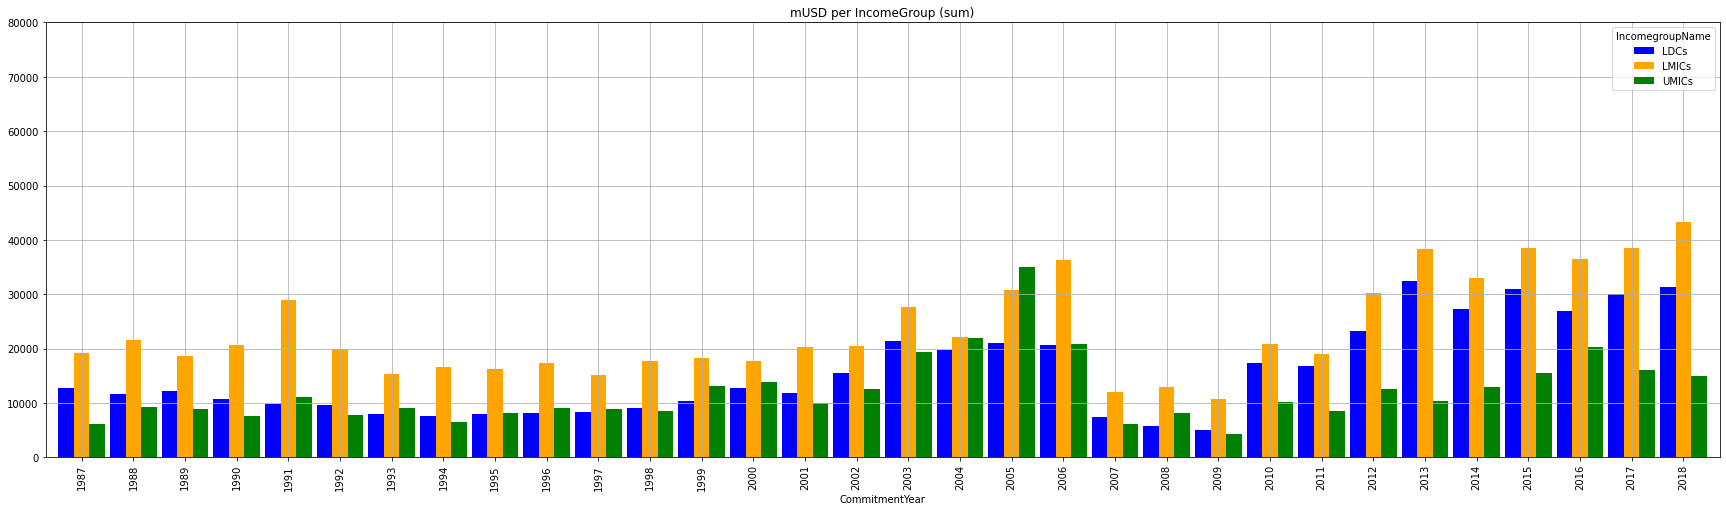

In [14]:
incomegroupclassfeaturename="IncomegroupName"

df = df_merged[df_merged['CommitmentDate'] > datetime(year=1986,month=12,day=31)]
df = df[df['CommitmentDate'] < datetime(year=2019,month=1,day=1)]
display(df.describe())
df = df[df[incomegroupclassfeaturename].isin(['LMICs','LDCs','UMICs'])]
# group by year and IncomegroupName
df = df.set_index("CommitmentDate")


display(df[df[incomegroupclassfeaturename].isnull()])
display(df.describe())
groupeddf = df.groupby([Grouper(freq="A"), incomegroupclassfeaturename])['USD_Commitment_Defl']

# resolve grouping, unstack, fill missing and reset_index()
ddf = groupeddf.sum().unstack().fillna(0.0).reset_index()

# an absolut view
# create index on year as string and drop old index
ddf["CommitmentYear"]=ddf["CommitmentDate"].apply(lambda x: str(x.year))
ddf = ddf.drop(columns=["CommitmentDate"]).set_index("CommitmentYear")

# plot absolut sum
ddf.plot(width=0.9,grid=True,kind='bar',title="mUSD per IncomeGroup (sum)",figsize=(30,8),
         ylim=(0, 80000),
         color={"LDCs": "blue", "LMICs": "orange", "UMICs": "green","Other LICs": "black","MADCTs": "black"}
        )
    

,USD_Commitment_Defl,USD_Received_Defl,USD_GrantEquiv,Donorstat AG.SRF.TOTL.K2,Donorstat longitude,Donorstat latitude,Recipientstat AG.SRF.TOTL.K2,Recipientstat longitude,Recipientstat latitude
count,1.049914e+06,364045.000000,287126.000000,1.049914e+06,1.049914e+06,1.049914e+06,1.049914e+06,1.034605e+06,1.034605e+06
mean,1.610866e+00,0.002750,0.517232,2.635784e+06,1.718132e+01,4.169135e+01,8.963489e+05,2.318257e+01,1.141555e+01
std,1.945486e+01,0.192794,9.714755,4.013665e+06,7.238393e+01,1.797359e+01,1.660829e+06,6.423036e+01,2.068902e+01
min,-2.180880e+01,0.000000,-7.321260,2.590000e+03,-7.703200e+01,-4.128650e+01,1.000000e+01,-1.752160e+02,-3.489410e+01
25%,1.561400e-02,0.000000,0.008874,2.677100e+05,-3.703270e+00,3.888950e+01,1.113700e+05,-7.500340e+00,-4.276700e+00
50%,7.631865e-02,0.000000,0.038704,3.779700e+05,6.129600e+00,4.189550e+01,3.420000e+05,3.050380e+01,1.214750e+01
75%,3.998460e-01,-0.000000,0.168792,7.741220e+06,1.806450e+01,5.150020e+01,1.001450e+06,7.143820e+01,2.863530e+01
max,4.704100e+03,43.047700,4087.440000,9.984670e+06,1.747760e+02,6.413530e+01,9.562950e+06,1.790896e+02,5.396780e+01


,DonorName,RecipientName,DonorCode,RecipientCode,IncomegroupName,USD_Commitment_Defl,USD_Received_Defl,ShortDescription,AgencyName,FlowCode,SectorCode,ProjectTitle,PurposeName,SectorName,ChannelName,ChannelReportedName,ExpectedStartDate,CompletionDate,LongDescription,USD_GrantEquiv,Donorstat AG.SRF.TOTL.K2,Donorstat iso3Code,Donorstat iso2Code,Donorstat region,Donorstat adminregion,Donorstat incomeLevel,Donorstat lendingType,Donorstat capitalCity,Donorstat longitude,Donorstat latitude,Recipientstat AG.SRF.TOTL.K2,Recipientstat iso3Code,Recipientstat iso2Code,Recipientstat region,Recipientstat adminregion,Recipientstat incomeLevel,Recipientstat lendingType,Recipientstat capitalCity,Recipientstat longitude,Recipientstat latitude,worldbank IncomeGroup
CommitmentDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


,USD_Commitment_Defl,USD_Received_Defl,USD_GrantEquiv,Donorstat AG.SRF.TOTL.K2,Donorstat longitude,Donorstat latitude,Recipientstat AG.SRF.TOTL.K2,Recipientstat longitude,Recipientstat latitude
count,1.040934e+06,360038.000000,283915.000000,1.040934e+06,1.040934e+06,1.040934e+06,1.040934e+06,1.025628e+06,1.025628e+06
mean,1.598781e+00,0.002780,0.521583,2.642312e+06,1.696315e+01,4.173491e+01,8.988970e+05,2.359483e+01,1.161752e+01
std,1.845662e+01,0.193863,9.768190,4.018913e+06,7.233545e+01,1.790123e+01,1.665936e+06,6.399315e+01,2.052017e+01
min,-2.180880e+01,0.000000,-7.321260,2.590000e+03,-7.703200e+01,-4.128650e+01,1.000000e+01,-1.752160e+02,-3.489410e+01
25%,1.577970e-02,0.000000,0.008955,2.677100e+05,-3.703270e+00,3.888950e+01,1.124900e+05,-7.500340e+00,-3.378400e+00
50%,7.711500e-02,0.000000,0.039068,3.779710e+05,6.129600e+00,4.189550e+01,3.420000e+05,3.050380e+01,1.214750e+01
75%,4.035640e-01,-0.000000,0.170492,7.741220e+06,1.806450e+01,5.150020e+01,1.001450e+06,7.143820e+01,2.863530e+01
max,4.704100e+03,43.047700,4087.440000,9.984670e+06,1.747760e+02,6.413530e+01,9.562950e+06,1.790896e+02,5.396780e+01


<AxesSubplot:title={'center':'mUSD per IncomeGroup (sum)'}, xlabel='CommitmentYear'>

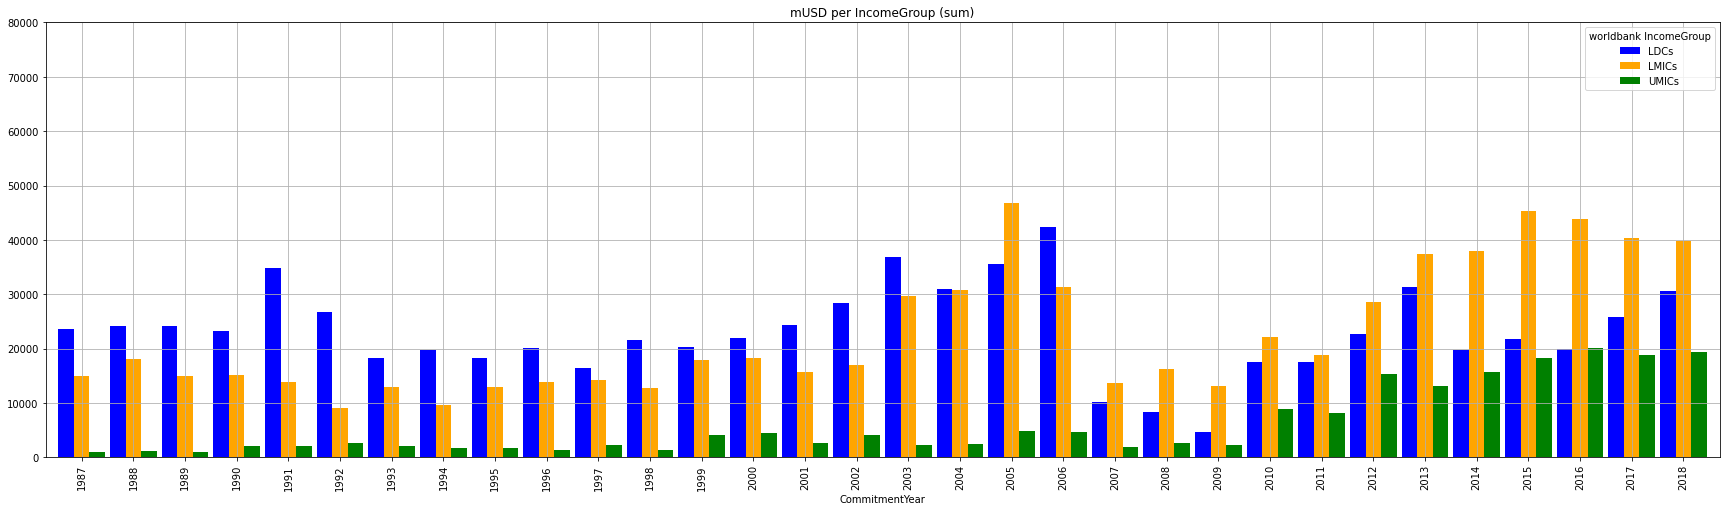

In [15]:
incomegroupclassfeaturename="worldbank IncomeGroup"

df = df_merged[df_merged['CommitmentDate'] > datetime(year=1986,month=12,day=31)]
df = df[df['CommitmentDate'] < datetime(year=2019,month=1,day=1)]
display(df.describe())
df = df[df[incomegroupclassfeaturename].isin(['LMICs','LDCs','UMICs'])]
# group by year and IncomegroupName
df = df.set_index("CommitmentDate")


display(df[df['worldbank IncomeGroup'].isnull()])
display(df.describe())
groupeddf = df.groupby([Grouper(freq="A"), incomegroupclassfeaturename])['USD_Commitment_Defl']

# resolve grouping, unstack, fill missing and reset_index()
ddf = groupeddf.sum().unstack().fillna(0.0).reset_index()

# an absolut view
# create index on year as string and drop old index
ddf["CommitmentYear"]=ddf["CommitmentDate"].apply(lambda x: str(x.year))
ddf = ddf.drop(columns=["CommitmentDate"]).set_index("CommitmentYear")

# plot absolut sum
ddf.plot(width=0.9,grid=True,kind='bar',title="mUSD per IncomeGroup (sum)",figsize=(30,8),
         ylim=(0, 80000),
         color={"LDCs": "blue", "LMICs": "orange", "UMICs": "green","Other LICs": "black","MADCTs": "black","HICs":"black"}
        )
    